In [211]:
"Importing the Lib"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [212]:
"Reading First Dataset "
covid_df=pd.read_csv("../Datasets/covid_19_india.csv")
covid_df.shape

(15114, 9)

In [213]:
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0
5,6.0,2020-02-04,6:00 PM,Kerala,3,0,0.0,0.0,3.0
6,7.0,2020-02-05,6:00 PM,Kerala,3,0,0.0,0.0,3.0
7,8.0,2020-02-06,6:00 PM,Kerala,3,0,0.0,0.0,3.0
8,9.0,2020-02-07,6:00 PM,Kerala,3,0,0.0,0.0,3.0
9,10.0,2020-02-08,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [214]:
# Information about the Dataset
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [215]:
# MAthmatical INformation
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,15086.000000,1.508600e+04,15086.000000,1.508600e+04
mean,7543.500000,1.747937e+05,2721.084449,1.942820e+05
std,4355.097416,3.648330e+05,7182.672358,4.095184e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3772.250000,1.685000e+03,12.000000,2.935500e+03
50%,7543.500000,1.964700e+04,364.000000,2.608150e+04
75%,11314.750000,2.087552e+05,2170.000000,2.216012e+05
max,15086.000000,4.927480e+06,83777.000000,5.433506e+06


# Data Cleaning

In [216]:
# # drop Unnecessary columns 
Coviddf=covid_df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],axis=1)


In [217]:
Coviddf.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [218]:
# Convert Date COlumn To Datetime Object
Coviddf["Date"]=pd.to_datetime(Coviddf["Date"],format='%Y-%m-%d')

In [219]:
Coviddf.head(5)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [220]:
# Drop the Null Values
Coviddf.dropna(inplace=True)
Coviddf.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


# Active Cases


In [221]:
Coviddf["Active_Cases"]=Coviddf["Confirmed"] -(Coviddf["Cured"] +Coviddf["Deaths"])
Coviddf.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
15081,2021-05-19,Telangana,485644.0,3012.0,536766.0,48110.0
15082,2021-05-19,Tripura,36402.0,450.0,42776.0,5924.0
15083,2021-05-19,Uttarakhand,214426.0,5132.0,295790.0,76232.0
15084,2021-05-19,Uttar Pradesh,1483249.0,18072.0,1637663.0,136342.0
15085,2021-05-19,West Bengal,1026492.0,13576.0,1171861.0,131793.0


In [222]:
statewise=pd.pivot_table(Coviddf,values =["Confirmed","Deaths","Cured"],
                         index="State/UnionTerritory",
                         aggfunc='max')

In [223]:
statewise.head()

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,6674.0,6359.0,92.0
Andhra Pradesh,1475372.0,1254291.0,9580.0
Arunachal Pradesh,22462.0,19977.0,88.0
Assam,340858.0,290774.0,2344.0
Bihar,664115.0,595377.0,4039.0


In [224]:
statewise["Recovery_Rate"]= statewise["Cured"] *100/statewise["Confirmed"]
statewise["Death_Rate"]= statewise["Deaths"] *100/statewise["Confirmed"]


In [225]:
statewise.sort_values(by='Confirmed',ascending=False,inplace=True)
statewise.head(10)

,Confirmed,Cured,Deaths,Recovery_Rate,Death_Rate
State/UnionTerritory,,,,,
Maharashtra,5433506.0,4927480.0,83777.0,90.686934,1.541859
Karnataka,2272374.0,1674487.0,22838.0,73.688882,1.005028
Kerala,2200706.0,1846105.0,6612.0,83.886944,0.300449
Tamil Nadu,1664350.0,1403052.0,18369.0,84.300297,1.103674
Uttar Pradesh,1637663.0,1483249.0,18072.0,90.571076,1.103524
Andhra Pradesh,1475372.0,1254291.0,9580.0,85.015237,0.649328
Delhi,1402873.0,1329899.0,22111.0,94.798246,1.576123
West Bengal,1171861.0,1026492.0,13576.0,87.595030,1.158499
Chhattisgarh,925531.0,823113.0,12036.0,88.934136,1.300443


In [226]:
statewise.style.background_gradient(cmap = 'cubehelix')

,Confirmed,Cured,Deaths,Recovery_Rate,Death_Rate
State/UnionTerritory,,,,,
Maharashtra,5433506.000000,4927480.000000,83777.000000,90.686934,1.541859
Karnataka,2272374.000000,1674487.000000,22838.000000,73.688882,1.005028
Kerala,2200706.000000,1846105.000000,6612.000000,83.886944,0.300449
Tamil Nadu,1664350.000000,1403052.000000,18369.000000,84.300297,1.103674
Uttar Pradesh,1637663.000000,1483249.000000,18072.000000,90.571076,1.103524
Andhra Pradesh,1475372.000000,1254291.000000,9580.000000,85.015237,0.649328
Delhi,1402873.000000,1329899.000000,22111.000000,94.798246,1.576123
West Bengal,1171861.000000,1026492.000000,13576.000000,87.595030,1.158499
Chhattisgarh,925531.000000,823113.000000,12036.000000,88.934136,1.300443


# Top 10 Countries based On Active Cases


In [227]:
Coviddf.head(2)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
0,2020-01-30,Kerala,0.0,0.0,1.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0,1.0


In [228]:
top_10_active_Cases=Coviddf.groupby(by ='State/UnionTerritory').max()[["Active_Cases","Date"]].sort_values(by='Active_Cases',ascending=False).reset_index()

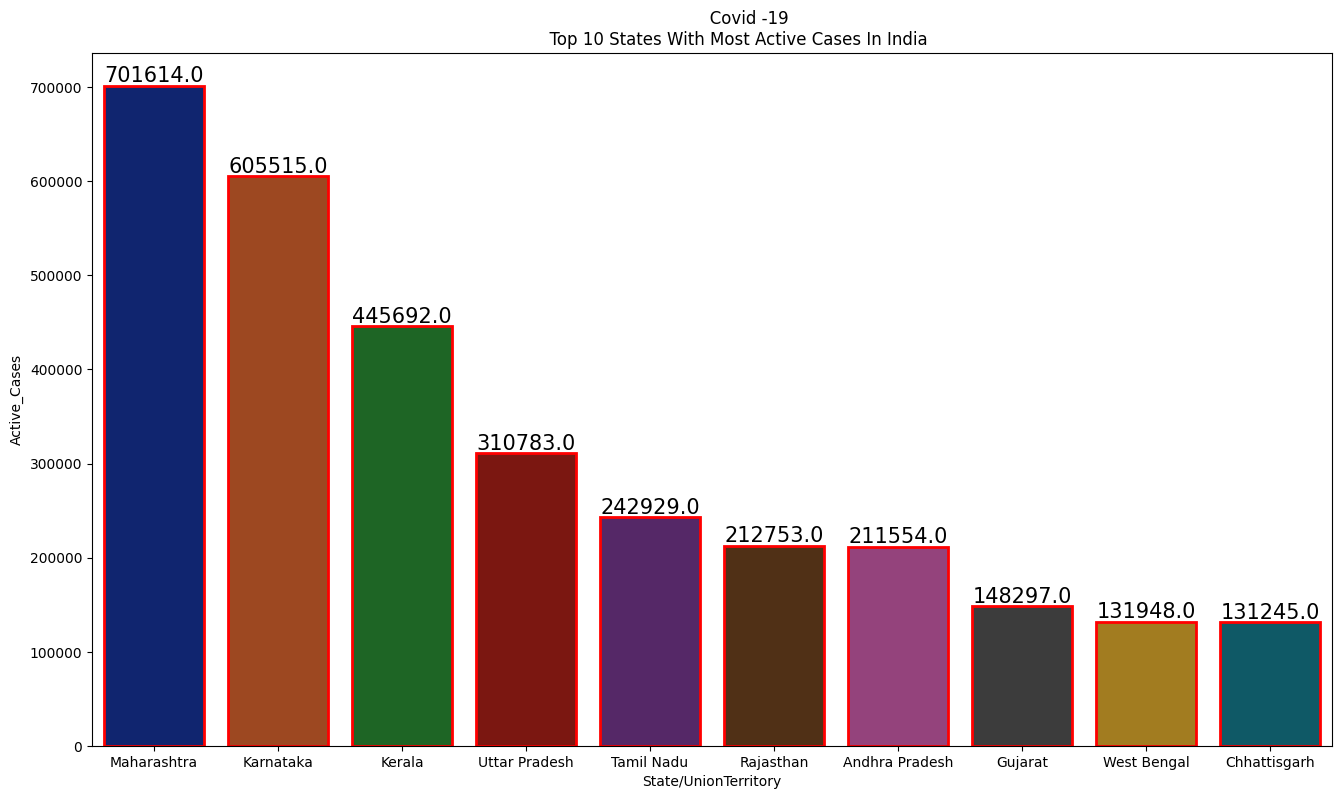

In [229]:
fig=plt.figure(figsize=(16,9))
plt.title("""               Covid -19 
          Top 10 States With Most Active Cases In India""")
ax=sns.barplot(data=top_10_active_Cases.iloc[:10],x="State/UnionTerritory",y='Active_Cases',linewidth=2,edgecolor='red',
               palette='dark',hue="State/UnionTerritory",legend=False)

for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,  
        height,
        f'{height:.1f}',  
        ha='center', va='bottom'  ,
        fontsize=15

    )
plt.show()


# Top 10 States With Highest Deaths 

In [230]:
top_10_deaths = Coviddf.groupby(by="State/UnionTerritory").max()[
    ["Deaths",
     "Date"]
].sort_values(by="Deaths",ascending=False).reset_index()

In [231]:
top_10_deaths[:10]

,State/UnionTerritory,Deaths,Date
0,Maharashtra,83777.0,2021-05-19
1,Karnataka,22838.0,2021-05-19
2,Delhi,22111.0,2021-05-19
3,Tamil Nadu,18369.0,2021-05-19
4,Uttar Pradesh,18072.0,2021-05-19
5,West Bengal,13576.0,2021-05-19
6,Punjab,12317.0,2021-05-19
7,Chhattisgarh,12036.0,2021-05-19
8,Andhra Pradesh,9580.0,2021-05-19
9,Gujarat,9269.0,2021-05-19


Text(0, 0.5, 'Total Deaths ')

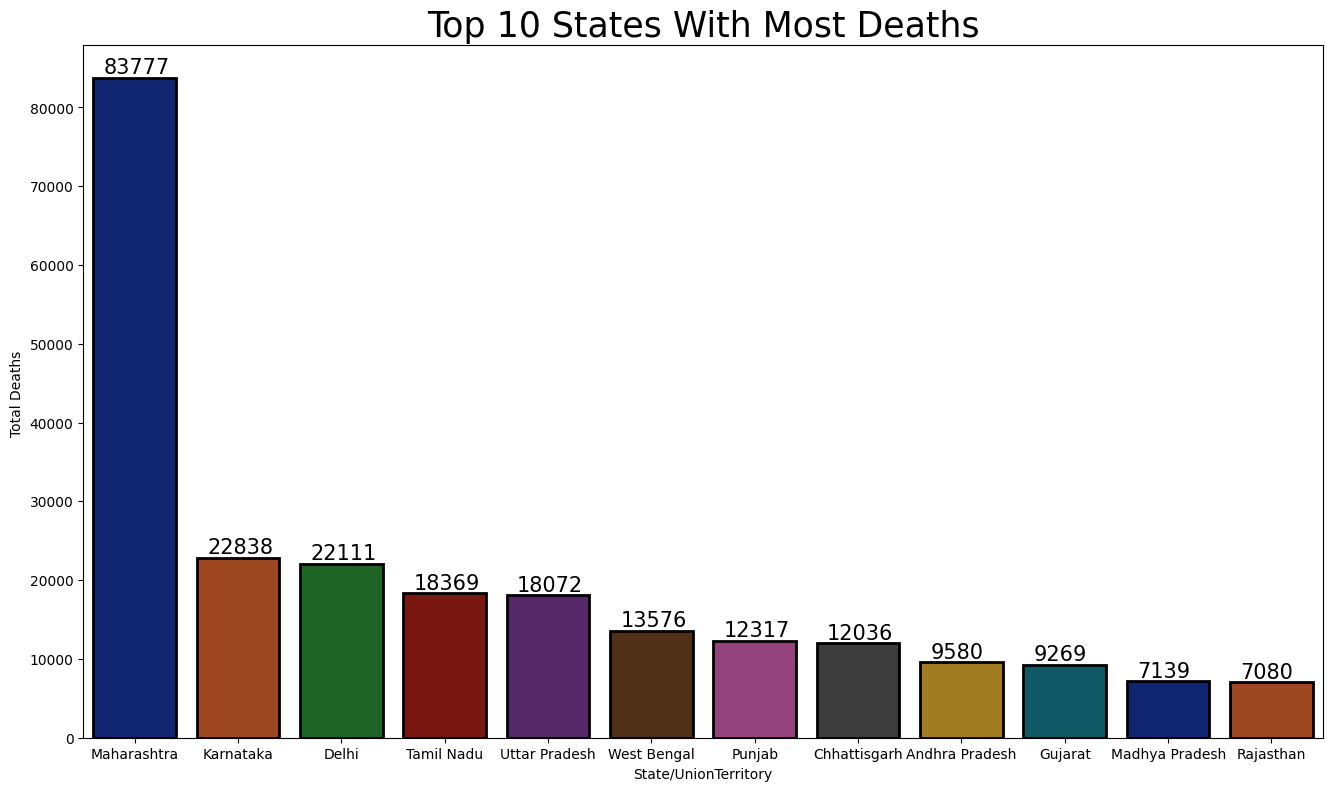

In [232]:
fig=plt.figure(figsize=(16,9))

plt.title("Top 10 States With Most Deaths",size=25)

ax=sns.barplot(data=top_10_deaths.iloc[:12],x="State/UnionTerritory",y="Deaths",
               linewidth=2,
               edgecolor="Black",
               hue="State/UnionTerritory",
               legend=False,
               palette="dark")

for i in ax.patches:
    height=i.get_height()

    ax.text(
        i.get_x() + i.get_width() // 2 + 0.1,
        height + 500
        ,
        f"{height:.0f}",
        fontsize=15

    )

plt.ylabel("Total Deaths ")

# Growth Trend

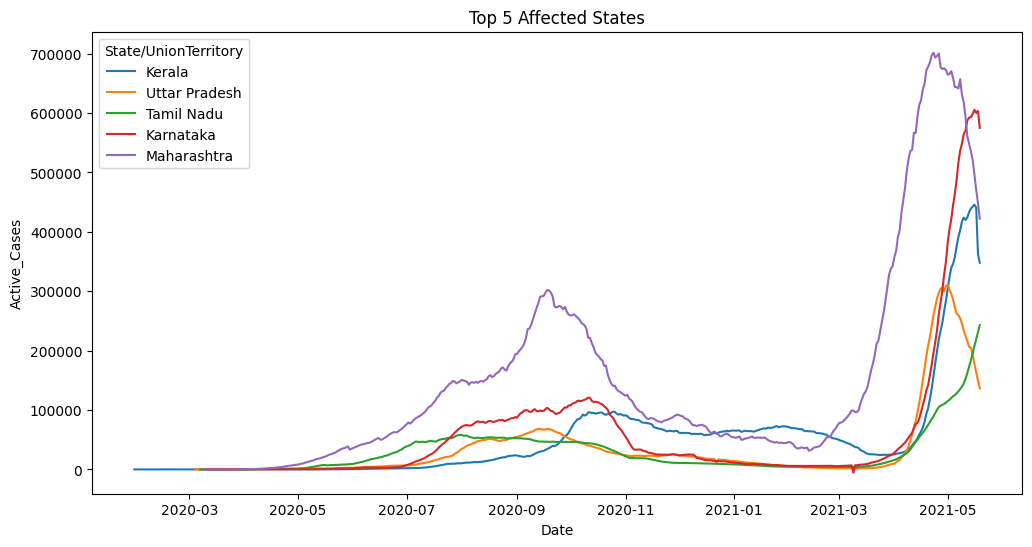

In [233]:
fig=plt.figure(figsize=(12,6))
ax=sns.lineplot(data=Coviddf[Coviddf["State/UnionTerritory"].isin(["Maharashtra","Karnataka","Kerala","Tamil Nadu","Uttar Pradesh"])],x='Date',y='Active_Cases',hue="State/UnionTerritory")

plt.title("Top 5 Affected States")
plt.show()

# Vaccine Dataset

In [234]:
vaccine_df=pd.read_csv("../Datasets/covid_vaccine_statewise.csv")

In [235]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


# Data Cleaning

In [236]:
vaccine_df.rename(columns={"Updated On":"Vaccine_Date"},inplace=True)

In [237]:
vaccine_df.head(5)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [238]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [239]:
vaccine_df.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [240]:
# drop Most Missing Colums
vaccine_df.drop(columns=["Sputnik V (Doses Administered)","AEFI","18-44 Years (Doses Administered)","45-60 Years (Doses Administered)","60+ Years (Doses Administered)"],inplace=True)

In [241]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

# Male vs Female Vaccination 


In [242]:
male=vaccine_df["Male(Individuals Vaccinated)"].sum()
female=vaccine_df["Female(Individuals Vaccinated)"].sum()

In [243]:
px.pie(names=["Male","Female"],values=[male,female],title="Males and Female Vaccination chart")

In [244]:
vaccine_df.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [248]:
# we can observe (State column) has India For some of the rows Drop them
vaccine_df=vaccine_df[vaccine_df["State"]!="India"]

In [ ]:
vaccine_df

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
1,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
2,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
3,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
4,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7628,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7629,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7630,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7631,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
vaccine_df.rename(columns={"Total Individuals Vaccinated":"Total"},inplace=True)

C:\Users\a\AppData\Local\Temp\ipykernel_10840\3276924725.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [256]:
vaccine_df.head(5)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0


# Most Vaccinated States(Most Number of Vaccinated Individuals)

In [ ]:
max_vac=vaccine_df.groupby('State')["Total"].sum().to_frame("Total")
max_vac.sort_values(by="Total",ascending=False,inplace=True)

In [ ]:
# tOP 5
max_vac[:5]

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


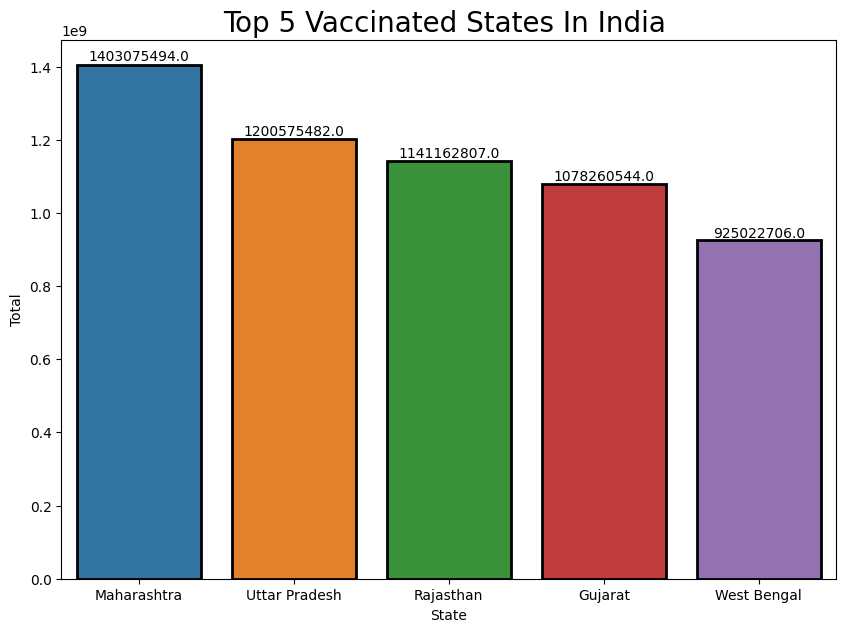

In [284]:
fig=plt.figure(figsize=(10,7))
plt.title("Top 5 Vaccinated States In India ",size=20)

ax=sns.barplot(data=max_vac[:5],x='State',y='Total',
               hue='State',legend=False,
               linewidth=2,
               edgecolor='Black'
               )

for i in ax.patches:
    height=i.get_height()
    ax.text(
        i.get_x() +i.get_width() /2,
        height+ 0.01*height,
        f'{height:.1f}'
        ,horizontalalignment='center'
    )

# Least Vaccinated States(least Number of Vaccinated Individuals)

In [291]:
least_5_vacc=vaccine_df.groupby("State")["Total"].sum().to_frame("Total").sort_values(by='Total')
least_5_vacc.head()

,Total
State,
Lakshadweep,2124715.0
Andaman and Nicobar Islands,8102125.0
Ladakh,9466289.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Sikkim,16136752.0


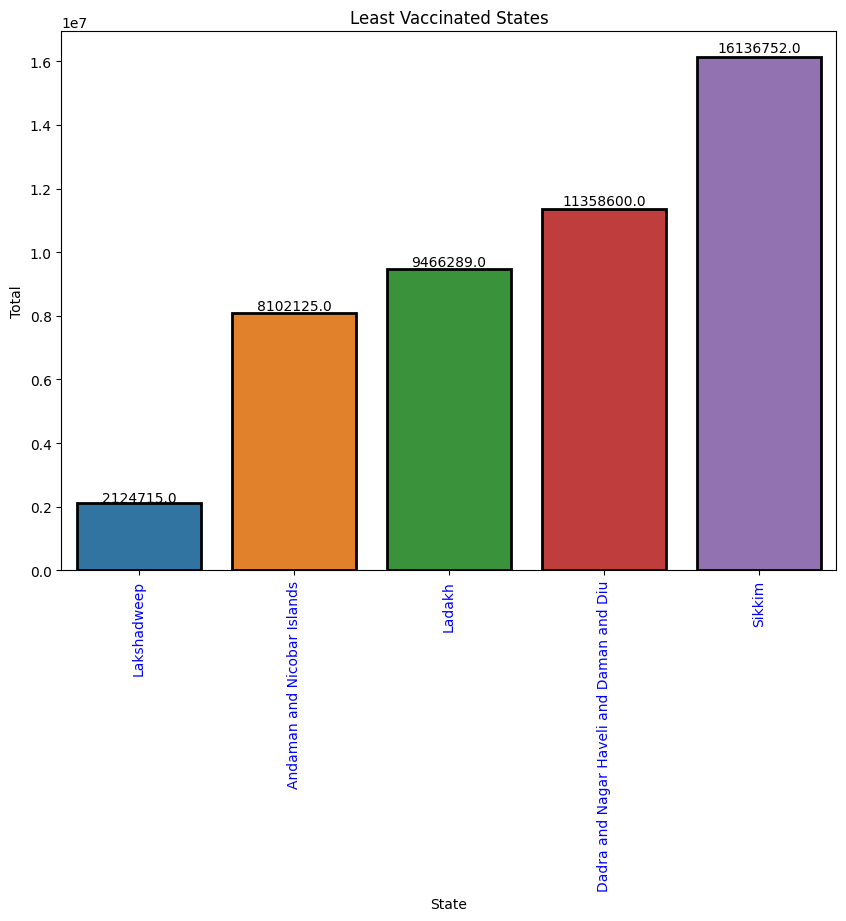

In [302]:
fig=plt.figure(figsize=(10,7))
plt.title("Least Vaccinated States")

ax=sns.barplot(data=least_5_vacc.head(),x='State',y='Total',
               hue='State',linewidth=2,edgecolor='black')

plt.xticks(rotation=90,color='blue')
for i in ax.patches:
    height=i.get_height()
    ax.text(
        i.get_x() +i.get_width() /2,
        height+ 0.01*height,
        f'{height:.1f}'
        ,horizontalalignment='center'
    )
plt.show()

# summary:

## 🧹 Data Cleaning

### 🧼 COVID Dataset:
- Dropped irrelevant columns: `Sno`, `Time`, `ConfirmedIndianNational`, etc.
- Converted `Date` column to datetime format
- Removed rows with null values

### 💉 Vaccination Dataset:
- Cleaned whitespace in column names
- dropped missing values 
- State (India ) in some rows : remove those rows

---

## 🔍 Deep Analysis & Insights

### 🦠 Active Cases Analysis
- Created new column: `Active = Confirmed - (Recovered + Deaths)`
- Visualized **Top 10 states** by active cases
- Found that **Maharashtra, Kerala, Karnataka** showed the highest burden

### 💀 Top 10 States with Highest Deaths
- Used grouped data to identify top 10 states with the highest cumulative deaths
- Maharashtra significantly led in total fatalities

### 📈 Growth Trend Analysis
- Aggregated data by date and visualized trends for:
  - Confirmed cases
  - Recovered cases
  - Deaths

### 💉 Vaccination Insights

#### 👥 Male vs Female Vaccination
- Compared total vaccinations by gender
- Visualized with bar and pie charts

#### 🔝 Most Vaccinated States
- **Uttar Pradesh, Maharashtra, and Gujarat** ranked highest in vaccinations

#### 🔻 Least Vaccinated States
- **Dadra & Nagar Haveli**, **Lakshadweep**, and other small UTs had low vaccination coverage

---
